In [1]:
from zs6d import ZS6D
import os
import json


# Loading the config file:
#with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
#    config = json.load(f)

with open(os.path.join("./zs6d_configs/bop_eval_configs/cfg_ycbv_inference_bop.json"), "r") as f:
    config = json.load(f)
    
# Instantiating the pose estimator:
# This involves handing over the path to the templates_gt file and the corresponding object norm_factors.
pose_estimator = ZS6D(config['templates_gt_path'], config['norm_factor_path'])



Using cache found in /home/kilian/.cache/torch/hub/facebookresearch_dino_main
100%|██████████| 21/21 [01:15<00:00,  3.58s/it]


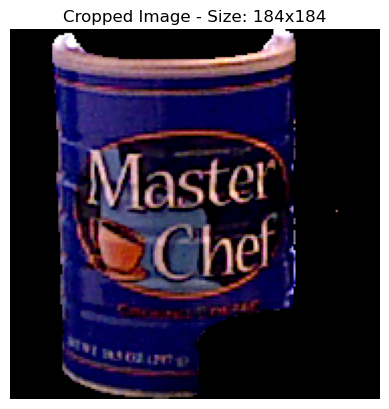

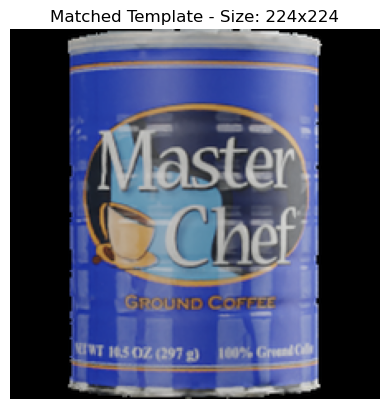

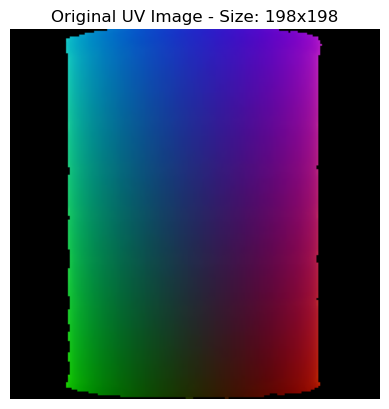

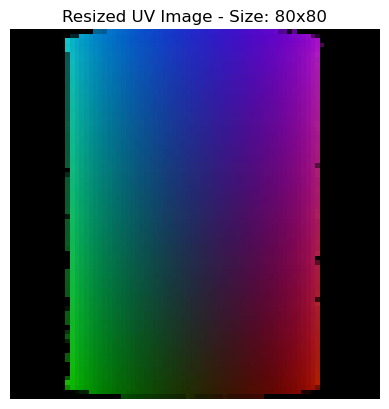

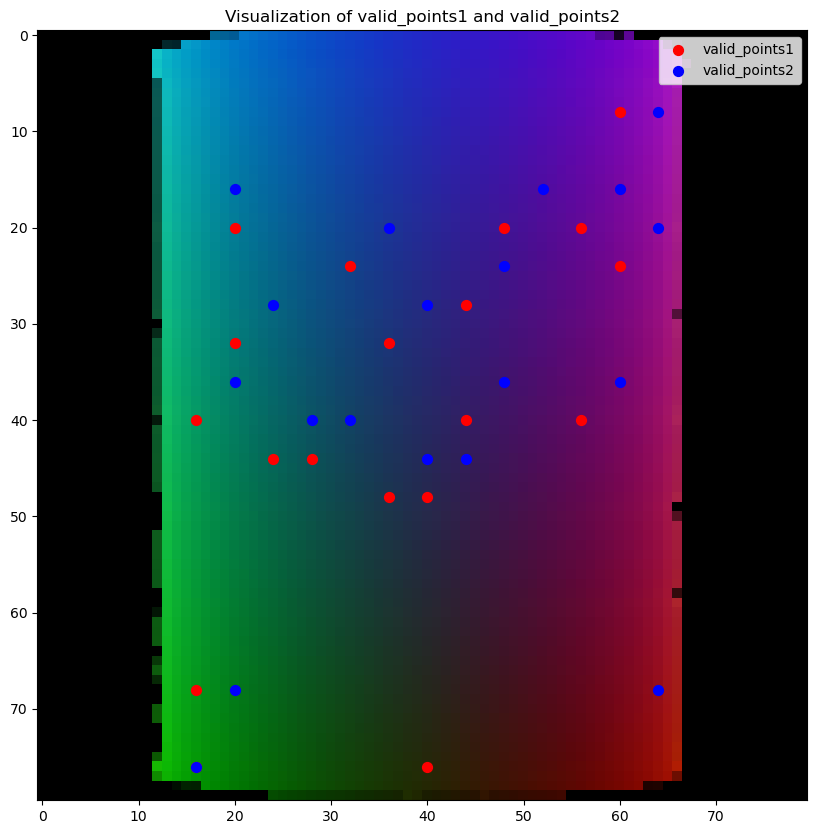

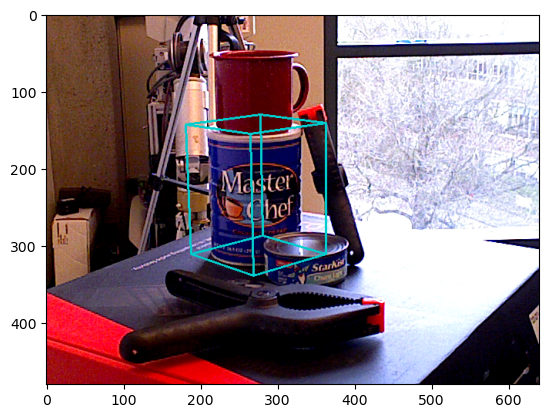

Pose estimation time: 18.597288131713867
R_est: [[ 0.73102202 -0.68222236 -0.01339667]
 [-0.16399643 -0.15660187 -0.97395124]
 [ 0.66235337  0.71417681 -0.22636145]]
t_est: [-31.5402504  -10.41202308 863.75919314]


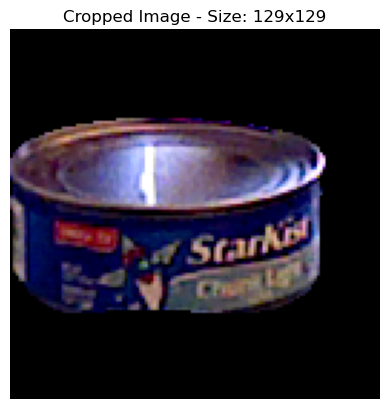

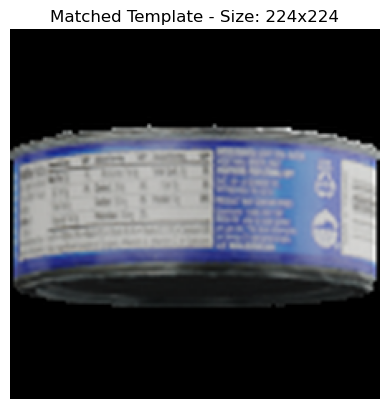

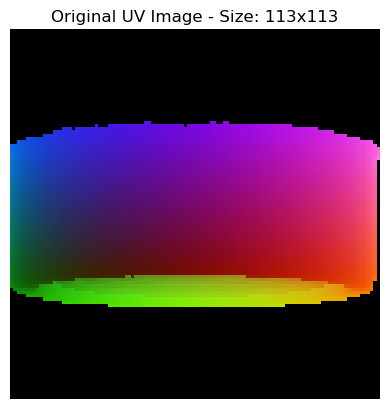

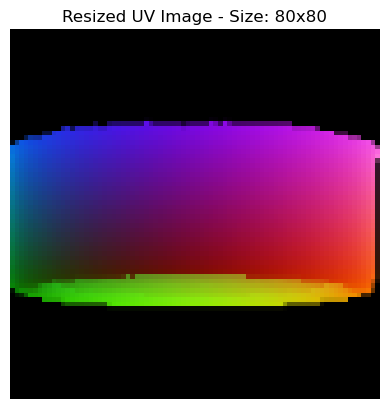

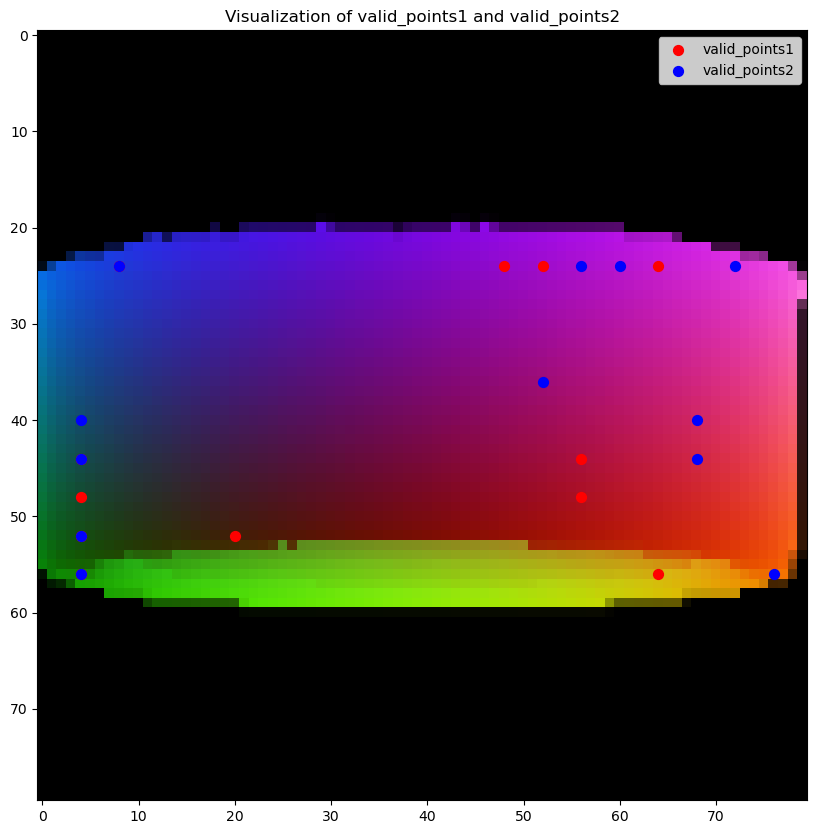

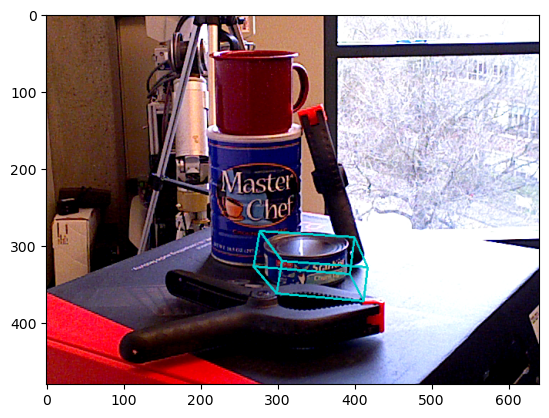

Pose estimation time: 0.9547030925750732
R_est: [[ 0.96325346  0.22300892  0.14969901]
 [ 0.05532053  0.38066957 -0.92305488]
 [-0.26283533  0.89741724  0.35434431]]
t_est: [ 24.12295947  61.36722496 753.1861135 ]


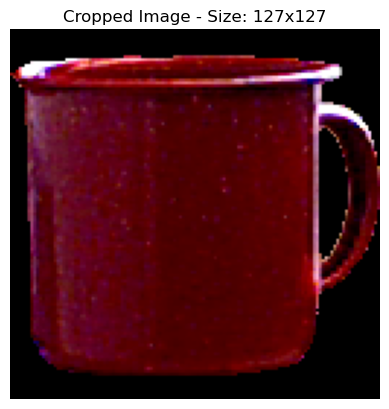

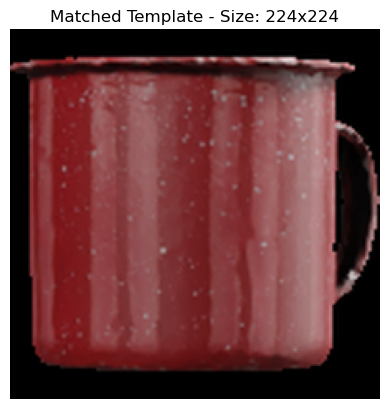

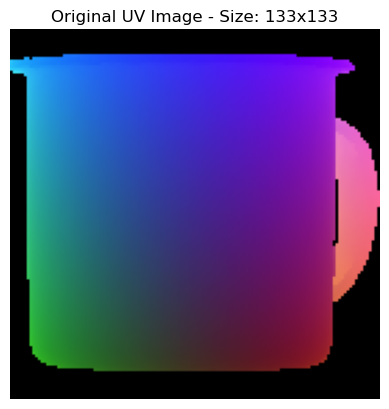

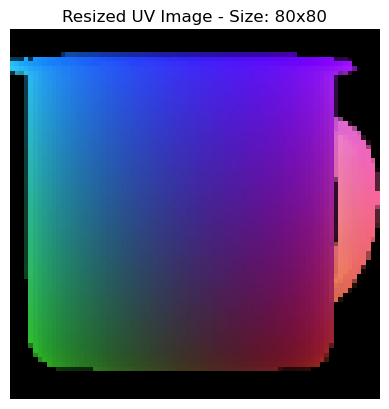

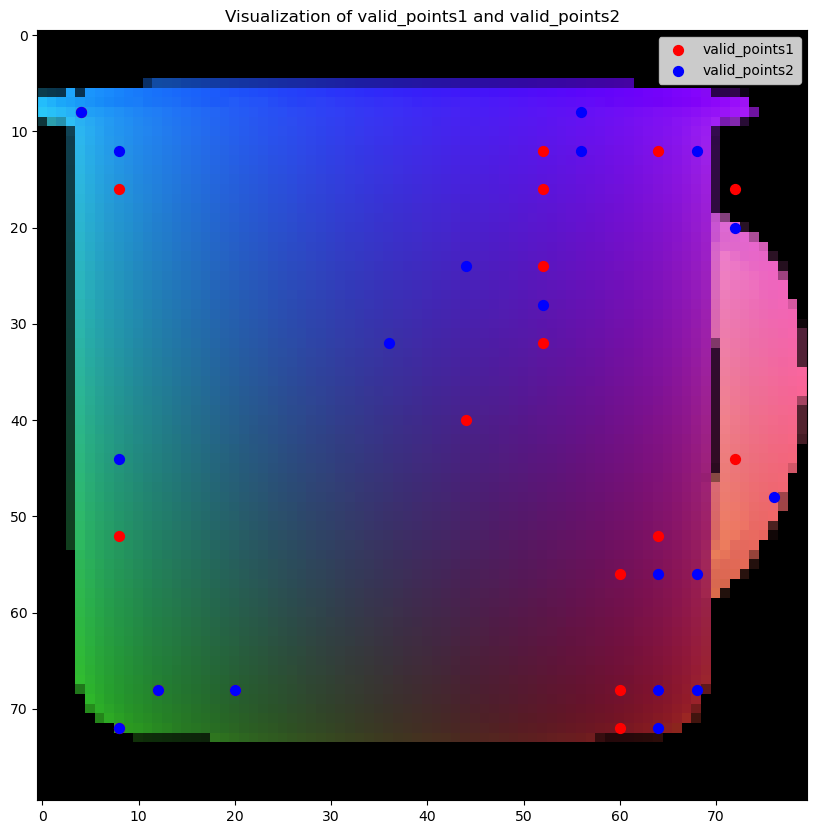

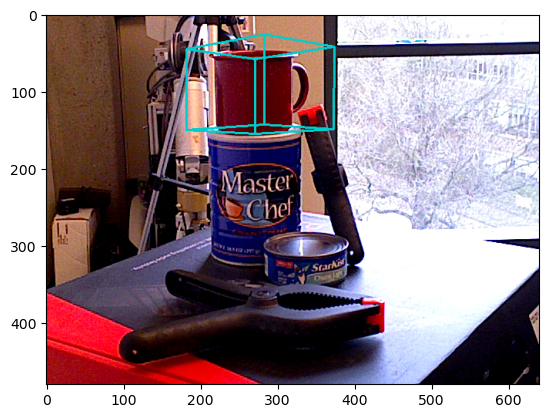

Pose estimation time: 1.0557997226715088
R_est: [[-0.69385594  0.72010597 -0.0033661 ]
 [-0.01641169 -0.0111399   0.99980326]
 [ 0.7199268   0.69377467  0.01954765]]
t_est: [  27.58910772  111.0510597  -822.31010435]


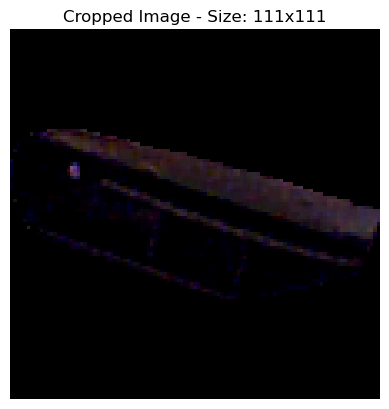

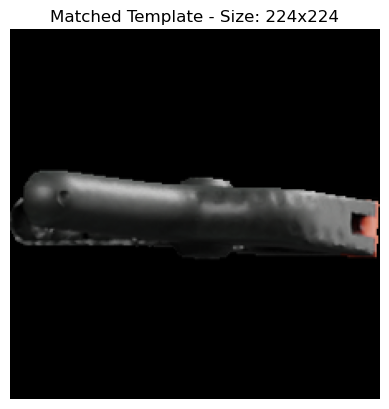

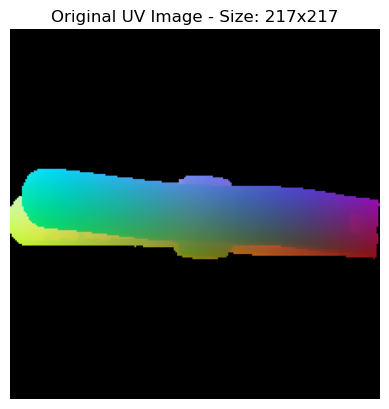

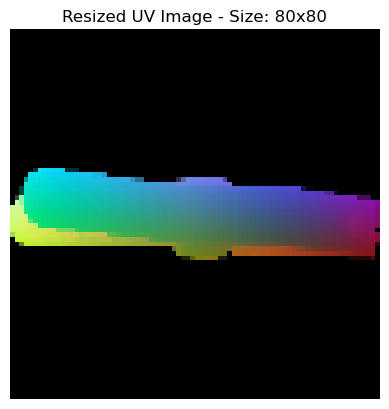

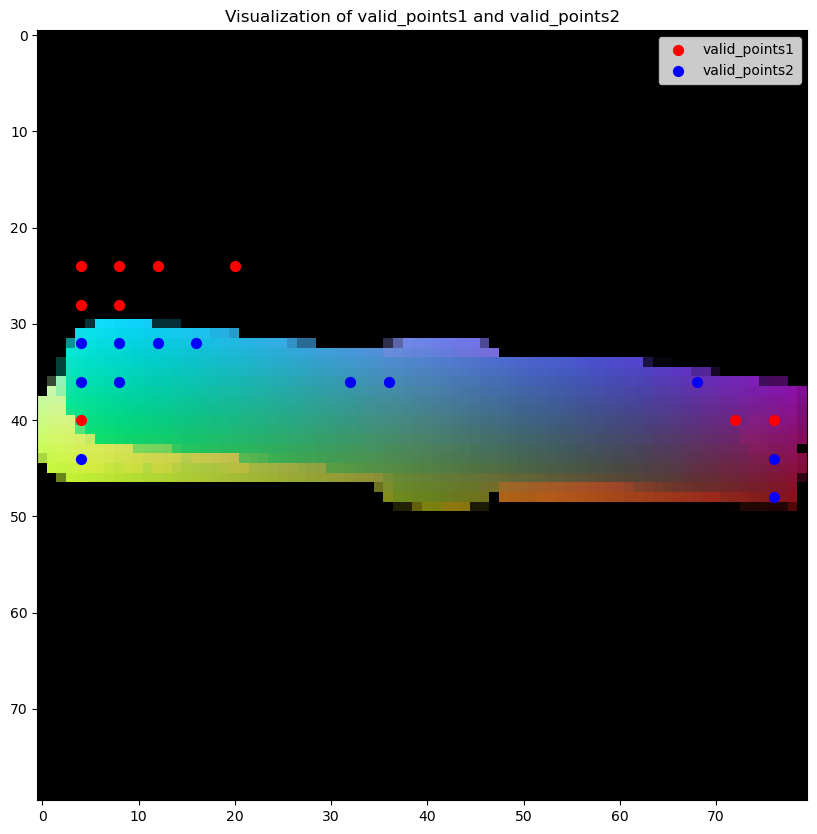

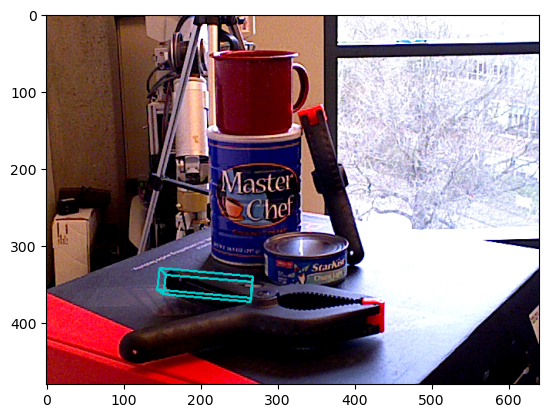

Pose estimation time: 0.9796640872955322
R_est: [[-0.04978238 -0.99540886  0.08174905]
 [ 0.18589091 -0.08965483 -0.97847155]
 [ 0.98130846 -0.03351423  0.18950069]]
t_est: [-152.41774358  162.50167082 1559.14378688]


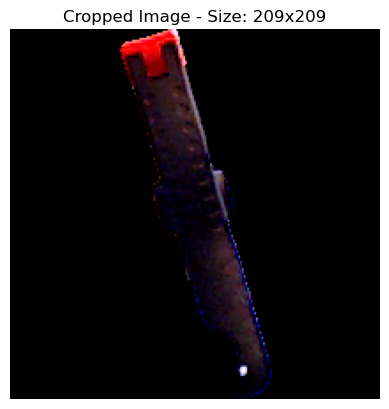

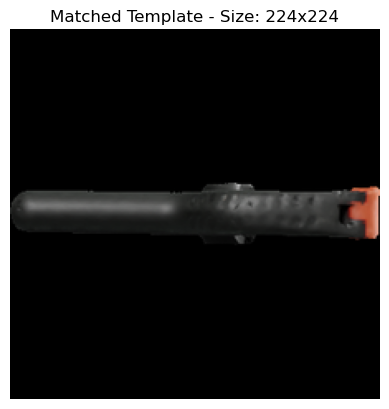

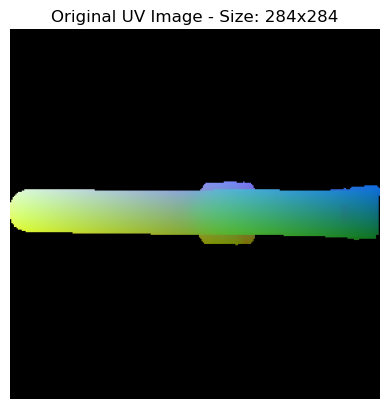

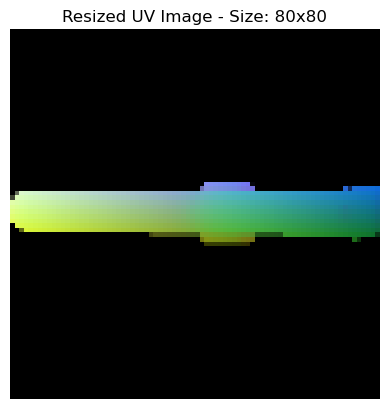

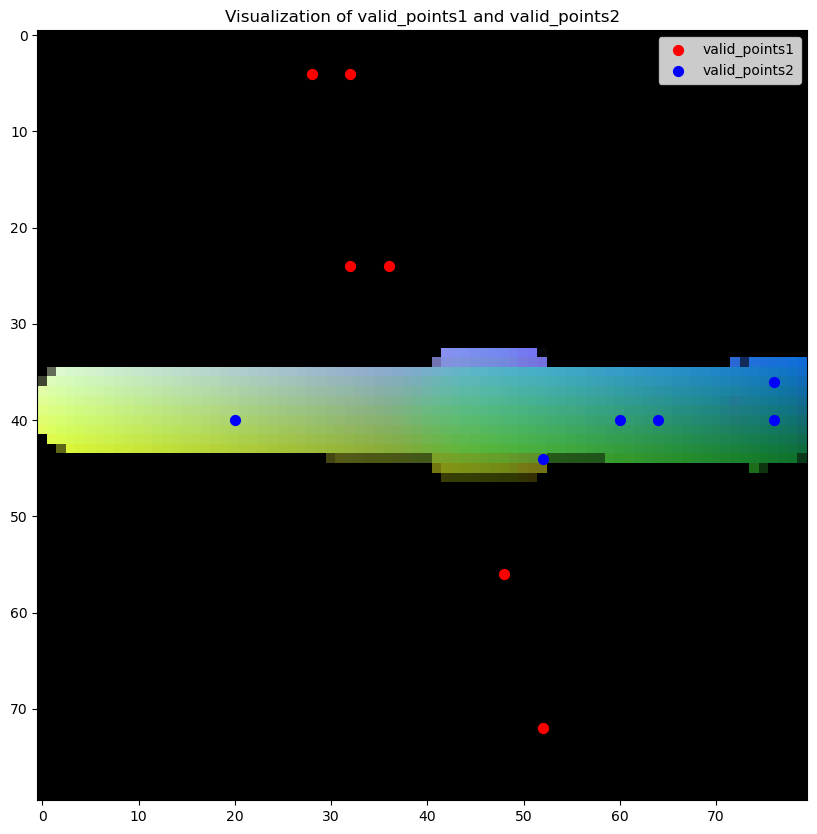

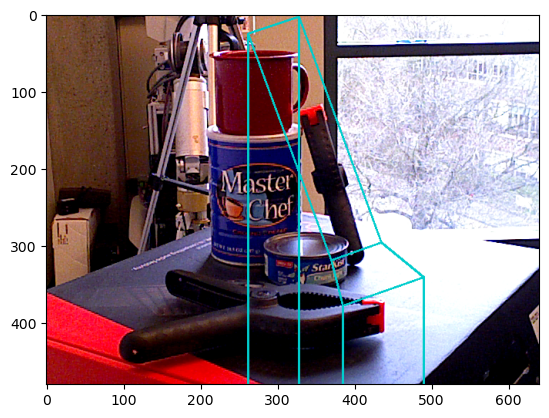

Pose estimation time: 0.890800952911377
R_est: [[-0.02974271  0.34316836  0.93880288]
 [ 0.01832648  0.93924774 -0.34275037]
 [-0.99938957  0.00701063 -0.03422484]]
t_est: [ 15.8807884  -40.26508462 453.53776953]


In [3]:
import cv2
from PIL import Image
import pose_utils.img_utils as img_utils
import pose_utils.vis_utils as vis_utils
import numpy as np
import time
import matplotlib.pyplot as plt

# Loading a ground truth file to access segmentation masks to test zs6d:
with open(os.path.join(config['gt_path']), 'r') as f:
    data_gt = json.load(f)

img_id = '000048_1'
#img_id = '8'



for i in range(len(data_gt[img_id])):
    obj_number = i
    obj_id = data_gt[img_id][obj_number]['obj_id']
    cam_K = np.array(data_gt[img_id][obj_number]['cam_K']).reshape((3,3))
    bbox = data_gt[img_id][obj_number]['bbox_visib']

    img_path = os.path.join(config['dataset_path'], data_gt[img_id][obj_number]['img_name'].split("./")[-1])
    img = Image.open(img_path)

    mask = data_gt[img_id][obj_number]['mask_sam']
    mask = img_utils.rle_to_mask(mask)
    mask = mask.astype(np.uint8)

    start_time = time.time()
    
    # To estimate the objects Rotation R and translation t the input image, the object_id, a segmentation mask and camera matrix are necessary
    R_est, t_est = pose_estimator.get_pose(img, str(obj_id), mask, cam_K, bbox=None)

    end_time = time.time()
    
    out_img = vis_utils.draw_3D_bbox_on_image(np.array(img), R_est, t_est, cam_K, data_gt[img_id][obj_number]['model_info'], factor=1.0)

    plt.imshow(out_img)
    plt.show()
    print(f"Pose estimation time: {end_time-start_time}")
    print(f"R_est: {R_est}")
    print(f"t_est: {t_est}")


